# GOLEM Fast Camera Data Visualization

This notebook demonstrates how to load and visualize fast camera data from the GOLEM tokamak using the `GolemDataLoader` module.

**Shot:** 47002  
**Camera:** Radial Fast Camera (80,000 fps)  
**Frame Format:** 1-pixel wide × 1280 pixels tall PNG images

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import fft
from golem_data_loader import GolemDataLoader

# Set matplotlib style for better-looking plots
plt.style.use('default')
%matplotlib inline

## 2. Initialize GOLEM Data Loader

Load data for shot 47002, which has fast camera data available.

In [2]:
# Initialize loader for shot 47002
shot_number = 50738
loader = GolemDataLoader(shot_number)

# Check available diagnostics
available = loader.get_available_diagnostics()
print(f"Shot {shot_number} - Available Diagnostics:")
for diagnostic, is_available in available.items():
    status = "✓" if is_available else "✗"
    print(f"  {status} {diagnostic}")

2026-01-18 11:23:30,239 - golem_data_loader.golem_data_loader - INFO - Successfully loaded plasma start time from http://golem.fjfi.cvut.cz/shots/50738/Diagnostics/PlasmaDetection/Results/t_plasma_start
2026-01-18 11:23:30,271 - golem_data_loader.golem_data_loader - INFO - Successfully loaded plasma end time from http://golem.fjfi.cvut.cz/shots/50738/Diagnostics/PlasmaDetection/Results/t_plasma_end
2026-01-18 11:23:30,271 - golem_data_loader.golem_data_loader - INFO - Loaded plasma timing: 1.46 - 12.43 ms


Shot 50738 - Available Diagnostics:
  ✓ Hα 656.5nm
  ✓ Cl II 479.5nm
  ✓ He I 588nm
  ✓ Whole
  ✓ C II 514.5nm
  ✓ N II 568.6nm
  ✓ O I 777nm
  ✓ He I 447.1nm
  ✓ MiniSpectrometer
  ✓ FastCamera_Radial
  ✓ FastCamera_Vertical


## 3. Load Fast Camera Data

Load the first 100 frames from the radial camera.

In [3]:
# Load fast camera data (limit to 100 frames for faster processing)
cameras = loader.load_fast_cameras(cameras=['vertical'], max_frames=600)

# Get the vertical camera data
vertical = cameras['vertical']

# Display information about the data
print(f"Camera type: {vertical.camera_type}")
print(f"Number of frames: {vertical.frames.shape[0]}")
print(f"Frame dimensions: {vertical.frames.shape[1:]} pixels")
print(f"Frame rate: {vertical.frame_rate} fps")
print(f"Time per frame: {1/vertical.frame_rate*1e6:.2f} μs")
print(f"Total duration: {vertical.time[-1]*1000:.3f} ms")
print(f"Data type: {vertical.frames.dtype}")

2026-01-18 11:23:31,080 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Fast Camera (Vertical) frame rate from http://golem.fjfi.cvut.cz/shots/50738/Diagnostics/FastCameras/Parameters/recrate_ux100b
2026-01-18 11:23:31,080 - golem_data_loader.golem_data_loader - INFO - Fast Camera (Vertical) frame rate: 40000.0 fps
2026-01-18 11:23:31,080 - golem_data_loader.golem_data_loader - INFO - Loading Fast Camera (Vertical) frames...


2026-01-18 11:23:31,092 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Fast Camera (Vertical) frame 1 from http://golem.fjfi.cvut.cz/shots/50738/Diagnostics/FastCameras/Camera_Vertical/Frames/1.png
2026-01-18 11:23:31,129 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Fast Camera (Vertical) frame 2 from http://golem.fjfi.cvut.cz/shots/50738/Diagnostics/FastCameras/Camera_Vertical/Frames/2.png
2026-01-18 11:23:31,161 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Fast Camera (Vertical) frame 3 from http://golem.fjfi.cvut.cz/shots/50738/Diagnostics/FastCameras/Camera_Vertical/Frames/3.png
2026-01-18 11:23:31,184 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Fast Camera (Vertical) frame 4 from http://golem.fjfi.cvut.cz/shots/50738/Diagnostics/FastCameras/Camera_Vertical/Frames/4.png
2026-01-18 11:23:31,198 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Fast Camera (Vertical) frame 5 from h

Camera type: vertical
Number of frames: 600
Frame dimensions: (1280, 3) pixels
Frame rate: 40000.0 fps
Time per frame: 25.00 μs
Total duration: 14.975 ms
Data type: uint8


## 4. Display Single Camera Frame

Plot a single frame from the fast camera as a grayscale image.

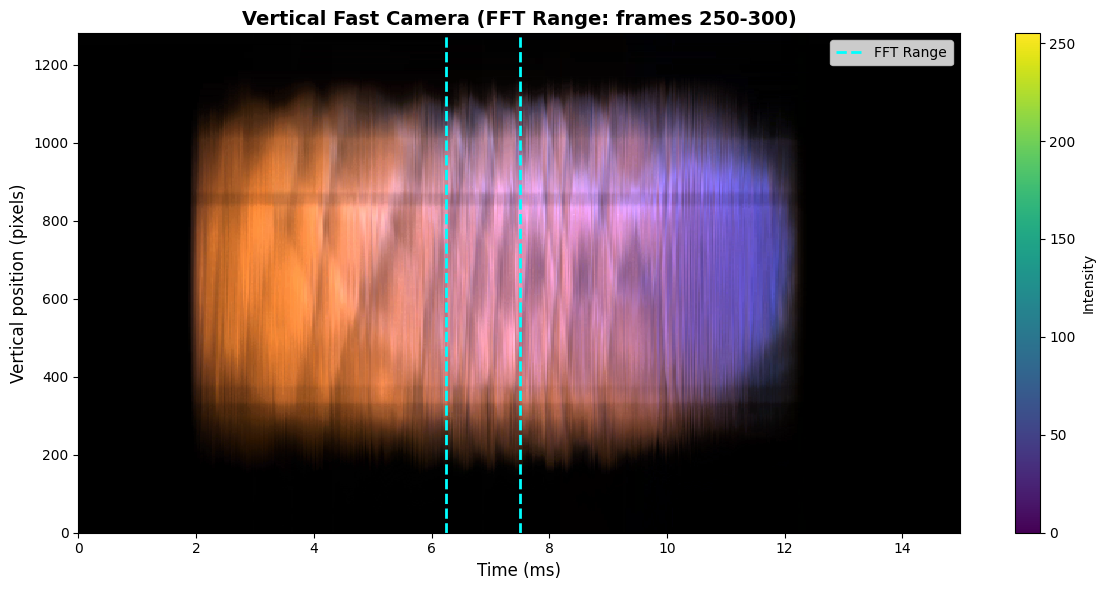

FFT will be computed on frames 250 to 300
Time range: 6.250 ms to 7.500 ms


In [4]:
fft_range = (250, 300)

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Display the frame - keep it 2D by transposing without squeeze for proper visualization
# Frame is (1, 1280), transpose to (1280, 1) for vertical display
im = ax.imshow(np.transpose(vertical.frames, axes=(1,0,2)), aspect='auto', interpolation='nearest', extent=(vertical.time[0]*1e3, vertical.time[-1]*1e3,0, vertical.frames.shape[1]))

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Intensity')

# Highlight the FFT range
ax.axvline(vertical.time[fft_range[0]]*1e3, color='cyan', linestyle='--', linewidth=2, label='FFT Range')
ax.axvline(vertical.time[fft_range[1]]*1e3, color='cyan', linestyle='--', linewidth=2)
ax.legend(loc='upper right')

# Labels and title
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Vertical position (pixels)', fontsize=12)
ax.set_title(f'Vertical Fast Camera (FFT Range: frames {fft_range[0]}-{fft_range[1]})', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"FFT will be computed on frames {fft_range[0]} to {fft_range[1]}")
print(f"Time range: {vertical.time[fft_range[0]]*1e3:.3f} ms to {vertical.time[fft_range[1]]*1e3:.3f} ms")

2026-01-18 11:29:24,491 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Hα 656.5nm spectrometry from http://golem.fjfi.cvut.cz/shots/50738/Diagnostics/FastSpectrometry/DAS_raw_data_dir/ch8.csv
2026-01-18 11:29:24,498 - golem_data_loader.golem_data_loader - INFO - Hα 656.5nm: loaded 19999 rows, columns = ['    0', '0.000']
2026-01-18 11:29:24,654 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Cl II 479.5nm spectrometry from http://golem.fjfi.cvut.cz/shots/50738/Diagnostics/FastSpectrometry/DAS_raw_data_dir/ch5.csv
2026-01-18 11:29:24,659 - golem_data_loader.golem_data_loader - INFO - Cl II 479.5nm: loaded 19999 rows, columns = ['    0', '0.000']
2026-01-18 11:29:24,902 - golem_data_loader.golem_data_loader - INFO - Successfully loaded He I 588nm spectrometry from http://golem.fjfi.cvut.cz/shots/50738/Diagnostics/FastSpectrometry/DAS_raw_data_dir/ch7.csv
2026-01-18 11:29:24,906 - golem_data_loader.golem_data_loader - INFO - He I 588nm: loaded 19999 

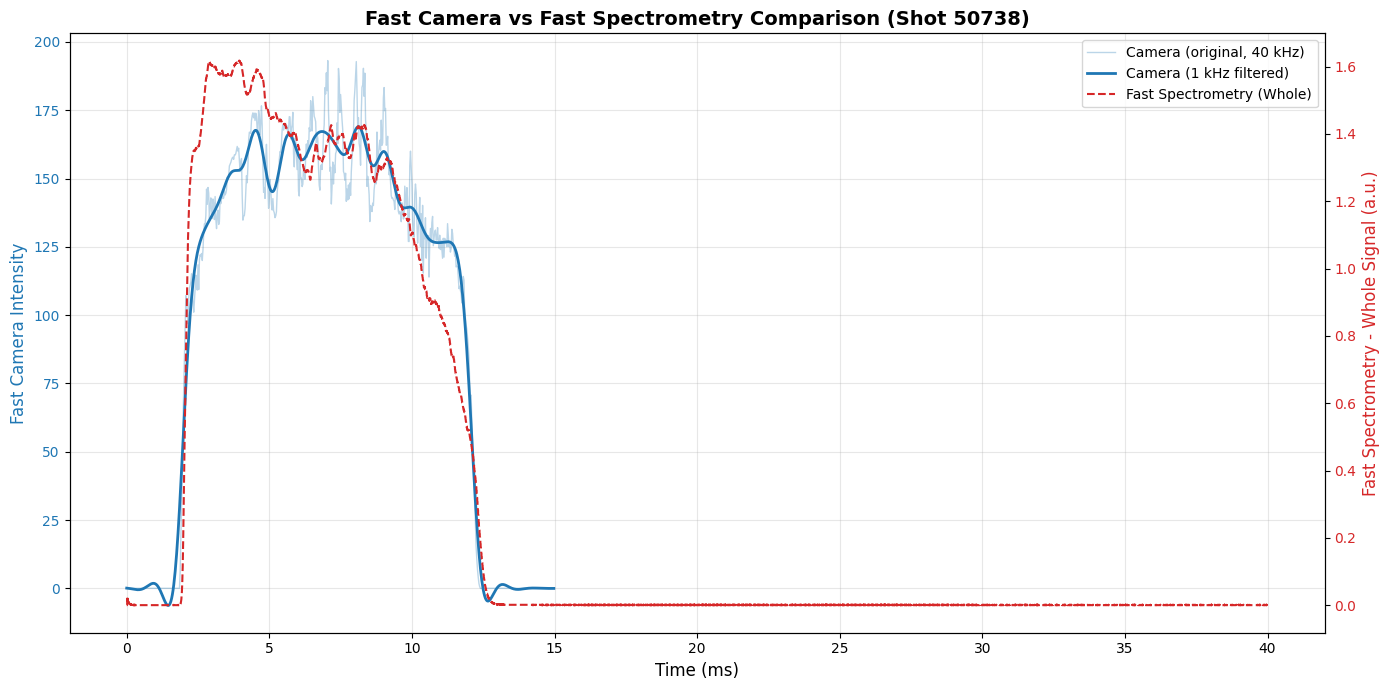

Fast Camera:
  Vertical interval: pixels 550 to 730 (height: 180px)
  Frame rate: 40.0 kHz (40000 fps)
  Time range: 0.000 - 14.975 ms
  Number of frames: 600

Fast Spectrometry (Whole):
  Time range: 0.002 - 40.000 ms
  Number of samples: 19999
  Average sampling rate: 500.00 kHz


In [6]:
from scipy import signal

# Extract intensity values for single pixel
pixel_index = 700
intensity_single = vertical.frames[:, pixel_index, :].mean(axis=1)

# Extract vertically averaged intensity
height = vertical.frames.shape[1]  # 1280 pixels
center = height // 2  # 640
interval_height = 180
start_px = center - interval_height // 2  # 550
end_px = center + interval_height // 2  # 730
vertical_avg = vertical.frames[:, start_px:end_px, :].mean(axis=(1, 2))

# Apply 1 kHz low-pass Butterworth filter to averaged data
sampling_freq = vertical.frame_rate  # Hz
cutoff_freq = 1000  # Hz (1 kHz)
nyquist_freq = sampling_freq / 2
normalized_cutoff = cutoff_freq / nyquist_freq

# Design a 4th order Butterworth low-pass filter
b, a = signal.butter(4, normalized_cutoff, btype='low')
vertical_avg_filtered = signal.filtfilt(b, a, vertical_avg)

# Load fast spectrometry data for comparison
spectrometry_data = loader.load_fast_spectrometry()
whole_signal = spectrometry_data['Whole']

# Create comprehensive comparison plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot fast camera data on left y-axis
ax1.set_xlabel('Time (ms)', fontsize=12)
ax1.set_ylabel('Fast Camera Intensity', fontsize=12, color='tab:blue')
ax1.plot(vertical.time * 1e3, vertical_avg, linewidth=1, alpha=0.3, color='tab:blue', 
         label=f'Camera (original, {vertical.frame_rate/1000:.0f} kHz)')
ax1.plot(vertical.time * 1e3, vertical_avg_filtered, linewidth=2, color='tab:blue', 
         label='Camera (1 kHz filtered)')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, alpha=0.3)

# Create second y-axis for spectrometry data
ax2 = ax1.twinx()
ax2.set_ylabel('Fast Spectrometry - Whole Signal (a.u.)', fontsize=12, color='tab:red')
ax2.plot(whole_signal.time * 1e3, whole_signal.intensity, linewidth=1.5, color='tab:red', 
         label='Fast Spectrometry (Whole)', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and combined legends
plt.title(f'Fast Camera vs Fast Spectrometry Comparison (Shot {shot_number})', 
          fontsize=14, fontweight='bold')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

print(f"Fast Camera:")
print(f"  Vertical interval: pixels {start_px} to {end_px} (height: {interval_height}px)")
print(f"  Frame rate: {vertical.frame_rate/1000:.1f} kHz ({vertical.frame_rate:.0f} fps)")
print(f"  Time range: {vertical.time[0]*1e3:.3f} - {vertical.time[-1]*1e3:.3f} ms")
print(f"  Number of frames: {len(vertical.time)}")
print(f"\nFast Spectrometry (Whole):")
print(f"  Time range: {whole_signal.time[0]*1e3:.3f} - {whole_signal.time[-1]*1e3:.3f} ms")
print(f"  Number of samples: {len(whole_signal.time)}")
print(f"  Average sampling rate: {1/(whole_signal.time[1]-whole_signal.time[0])/1000:.2f} kHz")